In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import requests
from matplotlib import pyplot as plt
import matplotlib
import seaborn as sns
import math
from os.path import exists
sns.set()
pd.set_option('display.max_columns', None)

In [2]:
if not exists("df.csv"):
    with requests.get(
        "https://docs.google.com/spreadsheets/d/1wduqo5WyYmCpaGnE81sLNGU0VSodIekMfpmEwU0fGqs/export?format=csv"
    ) as r, open("df.csv", "wb") as f:
        for chunk in r.iter_content():
            f.write(chunk)

df_features = pd.read_csv("df.csv", low_memory = False)
df_features

,barrio,dia,direccion_viento_tarde,direccion_viento_temprano,horas_de_sol,humedad_tarde,humedad_temprano,id,llovieron_hamburguesas_hoy,mm_evaporados_agua,mm_lluvia_dia,nubosidad_tarde,nubosidad_temprano,presion_atmosferica_tarde,presion_atmosferica_temprano,rafaga_viento_max_direccion,rafaga_viento_max_velocidad,temp_max,temp_min,temperatura_tarde,temperatura_temprano,velocidad_viendo_tarde,velocidad_viendo_temprano
0,Retiro,2016-10-11,Este,Nornoreste,10.7,59.0,56.0,86942,no,16.0,0.0,3.0,1.0,1009.9,1010.2,Estesureste,33.0,29.2,16.8,24.1,25.3,19.0,4.0
1,Vélez Sársfield,2016-03-28,Sur,suroeste,0.0,49.0,83.0,102098,no,2.6,0.0,8.0,7.0,1020.4,1021.4,Sur,31.0,16.9,10.6,16.4,12.3,13.0,7.0
2,Palermo,2017-05-11,Sursureste,Norte,4.3,59.0,83.0,67154,no,2.4,0.0,7.0,7.0,1024.8,1026.5,Norte,26.0,16.6,4.4,15.7,9.4,9.0,13.0
3,Mataderos,2012-05-07,suroeste,Sur,NaN,67.0,93.0,50245,no,NaN,0.0,NaN,NaN,1017.0,1020.0,Oestesuroeste,13.0,11.4,0.8,11.1,4.0,6.0,6.0
4,Recoleta,2014-06-19,Nornoreste,Nornoreste,0.8,94.0,97.0,82904,no,0.8,0.0,NaN,NaN,1016.1,1021.9,Nornoreste,33.0,11.6,6.7,11.2,8.8,11.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116363,Villa Lugano,2011-03-07,Oestesuroeste,Sureste,11.6,35.0,44.0,118424,no,8.4,0.0,1.0,7.0,1011.9,1015.9,suroeste,43.0,28.7,17.4,27.8,23.0,30.0,11.0
116364,Saavedra,2009-07-25,Sureste,Sursureste,1.0,68.0,80.0,87436,no,7.4,0.0,8.0,7.0,1015.1,1018.2,Sureste,44.0,26.3,19.0,24.0,21.9,30.0,19.0
116365,Villa General Mitre,2013-11-11,suroeste,Sur,11.1,19.0,43.0,116306,no,NaN,0.0,1.0,2.0,1011.3,1014.4,Oestesuroeste,35.0,34.5,10.2,32.8,24.2,24.0,9.0
116366,Villa Devoto,2010-08-17,Sursuroeste,NaN,NaN,71.0,99.0,112204,no,NaN,0.4,NaN,NaN,1004.7,1005.2,Sursuroeste,43.0,16.5,5.0,13.6,11.4,26.0,0.0


In [3]:
if not exists("df_resultados.csv"):
    with requests.get(
        "https://docs.google.com/spreadsheets/d/1gvZ03uAL6THwd04Y98GtIj6SeAHiKyQY5UisuuyFSUs/export?format=csv"
    ) as r, open("df_resultados.csv", "wb") as f:
        for chunk in r.iter_content():
            f.write(chunk)

df_target = pd.read_csv("df_resultados.csv", low_memory=False)
df_target

,id,llovieron_hamburguesas_al_dia_siguiente
0,86942,no
1,102098,no
2,67154,no
3,50245,no
4,82904,no
...,...,...
116363,118424,no
116364,87436,si
116365,116306,no
116366,112204,si


In [4]:
df = df_features.merge(df_target, on = 'id')
df.set_index("id", inplace=True)
df_original = df.copy()
df

,barrio,dia,direccion_viento_tarde,direccion_viento_temprano,horas_de_sol,humedad_tarde,humedad_temprano,llovieron_hamburguesas_hoy,mm_evaporados_agua,mm_lluvia_dia,nubosidad_tarde,nubosidad_temprano,presion_atmosferica_tarde,presion_atmosferica_temprano,rafaga_viento_max_direccion,rafaga_viento_max_velocidad,temp_max,temp_min,temperatura_tarde,temperatura_temprano,velocidad_viendo_tarde,velocidad_viendo_temprano,llovieron_hamburguesas_al_dia_siguiente
id,,,,,,,,,,,,,,,,,,,,,,,
86942,Retiro,2016-10-11,Este,Nornoreste,10.7,59.0,56.0,no,16.0,0.0,3.0,1.0,1009.9,1010.2,Estesureste,33.0,29.2,16.8,24.1,25.3,19.0,4.0,no
102098,Vélez Sársfield,2016-03-28,Sur,suroeste,0.0,49.0,83.0,no,2.6,0.0,8.0,7.0,1020.4,1021.4,Sur,31.0,16.9,10.6,16.4,12.3,13.0,7.0,no
67154,Palermo,2017-05-11,Sursureste,Norte,4.3,59.0,83.0,no,2.4,0.0,7.0,7.0,1024.8,1026.5,Norte,26.0,16.6,4.4,15.7,9.4,9.0,13.0,no
50245,Mataderos,2012-05-07,suroeste,Sur,NaN,67.0,93.0,no,NaN,0.0,NaN,NaN,1017.0,1020.0,Oestesuroeste,13.0,11.4,0.8,11.1,4.0,6.0,6.0,no
82904,Recoleta,2014-06-19,Nornoreste,Nornoreste,0.8,94.0,97.0,no,0.8,0.0,NaN,NaN,1016.1,1021.9,Nornoreste,33.0,11.6,6.7,11.2,8.8,11.0,15.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118424,Villa Lugano,2011-03-07,Oestesuroeste,Sureste,11.6,35.0,44.0,no,8.4,0.0,1.0,7.0,1011.9,1015.9,suroeste,43.0,28.7,17.4,27.8,23.0,30.0,11.0,no
87436,Saavedra,2009-07-25,Sureste,Sursureste,1.0,68.0,80.0,no,7.4,0.0,8.0,7.0,1015.1,1018.2,Sureste,44.0,26.3,19.0,24.0,21.9,30.0,19.0,si
116306,Villa General Mitre,2013-11-11,suroeste,Sur,11.1,19.0,43.0,no,NaN,0.0,1.0,2.0,1011.3,1014.4,Oestesuroeste,35.0,34.5,10.2,32.8,24.2,24.0,9.0,no


## ¿Cómo son las columnas del dataset?

In [5]:
df.info()
display(df.sample(2))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116368 entries, 86942 to 34196
Data columns (total 23 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   barrio                                   116368 non-null  object 
 1   dia                                      116368 non-null  object 
 2   direccion_viento_tarde                   112995 non-null  object 
 3   direccion_viento_temprano                107965 non-null  object 
 4   horas_de_sol                             60512 non-null   float64
 5   humedad_tarde                            112773 non-null  float64
 6   humedad_temprano                         114251 non-null  float64
 7   llovieron_hamburguesas_hoy               113753 non-null  object 
 8   mm_evaporados_agua                       66157 non-null   float64
 9   mm_lluvia_dia                            113753 non-null  float64
 10  nubosidad_tarde              

,barrio,dia,direccion_viento_tarde,direccion_viento_temprano,horas_de_sol,humedad_tarde,humedad_temprano,llovieron_hamburguesas_hoy,mm_evaporados_agua,mm_lluvia_dia,nubosidad_tarde,nubosidad_temprano,presion_atmosferica_tarde,presion_atmosferica_temprano,rafaga_viento_max_direccion,rafaga_viento_max_velocidad,temp_max,temp_min,temperatura_tarde,temperatura_temprano,velocidad_viendo_tarde,velocidad_viendo_temprano,llovieron_hamburguesas_al_dia_siguiente
id,,,,,,,,,,,,,,,,,,,,,,,
92093,San Cristóbal,2014-03-27,Estesureste,Este,NaN,98.0,80.0,si,NaN,4.4,NaN,NaN,1016.9,1020.8,Estenoreste,54.0,25.2,22.8,23.4,24.7,39.0,24.0,si
131340,Villa Real,2012-09-10,Sureste,Nornoreste,1.3,87.0,67.0,no,4.8,0.0,NaN,NaN,1019.4,1016.9,Oestenoroeste,74.0,11.7,11.2,9.6,11.5,13.0,13.0,si


Podemos ver que la feature presion_atmosferica_tarde esta con tipo de dato extraño, cuando en realidad debería ser un número.
También las columnas de llovieron_hamburguesas_hoy y llovieron_hamburguesas_al_dia_siguiente son strings. Nos parece más convenientes que sean simplemente números donde 'no' es 0 y 'si' es 1.

In [6]:
#df.replace({'llovieron_hamburguesas_hoy' : {'si' : 1, 'no' : 0}}, inplace = True)
#df.replace({'llovieron_hamburguesas_al_dia_siguiente' : {'si' : 1, 'no' : 0}}, inplace = True)
#df.astype({'llovieron_hamburguesas_hoy': np.float64, 'llovieron_hamburguesas_al_dia_siguiente' : np.float64,
#           'presion_atmosferica_tarde' : np.float64})

try:
    df.astype({'presion_atmosferica_tarde' : np.float64})
except Exception as e:
    print(str(e))

#df.info()

could not convert string to float: '1.009.555'


En *presion_atmosferica_tarde* falla al transformarse a número por que hay un valor con 2 puntos. Vamos a asumir que el primer punto es separador de millares mientras que el segundo de decimales, ya que las presiones rondan el valor de 1000.

In [7]:
df = df.astype({'presion_atmosferica_tarde' : str})
for index, row in df.iterrows():
    if (row['presion_atmosferica_tarde'].count(".") > 1):
        print(f"Fila {index} tiene más de un punto({row['presion_atmosferica_tarde']})")

Fila 30388 tiene más de un punto(1.009.555)
Fila 30418 tiene más de un punto(10.167.769.999.999.900)


In [8]:
df.drop(30418, inplace = True)
df.drop(30388, inplace = True)
df['presion_atmosferica_tarde'] = df['presion_atmosferica_tarde'].astype(np.float64)

In [9]:
df.replace({'llovieron_hamburguesas_hoy' : {'si' : 1, 'no' : 0},
            'llovieron_hamburguesas_al_dia_siguiente' : {'si' : 1, 'no' : 0}}, inplace = True)
df = df.astype({'llovieron_hamburguesas_hoy' : np.float64})
df = df.astype({'llovieron_hamburguesas_al_dia_siguiente' : np.float64})

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116366 entries, 86942 to 34196
Data columns (total 23 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   barrio                                   116366 non-null  object 
 1   dia                                      116366 non-null  object 
 2   direccion_viento_tarde                   112993 non-null  object 
 3   direccion_viento_temprano                107963 non-null  object 
 4   horas_de_sol                             60510 non-null   float64
 5   humedad_tarde                            112771 non-null  float64
 6   humedad_temprano                         114249 non-null  float64
 7   llovieron_hamburguesas_hoy               113751 non-null  float64
 8   mm_evaporados_agua                       66156 non-null   float64
 9   mm_lluvia_dia                            113751 non-null  float64
 10  nubosidad_tarde              

## ¿Hay datos faltantes? ¿Cómo se distribuyen?

### Vemos como están representados los datos faltantes

In [11]:
print(f"'-':\t{df.astype('str').eq('-').any(None)}")
print(f"' ':\t{df.astype('str').eq(' ').any(None)}")
print(f"NaN:\t{df.astype('str').eq('nan').any(None)}")

'-':	False
' ':	False
NaN:	True


### Podemos ver que aparecen como NaN. Graficamos el porcentaje de datos faltantes por feature

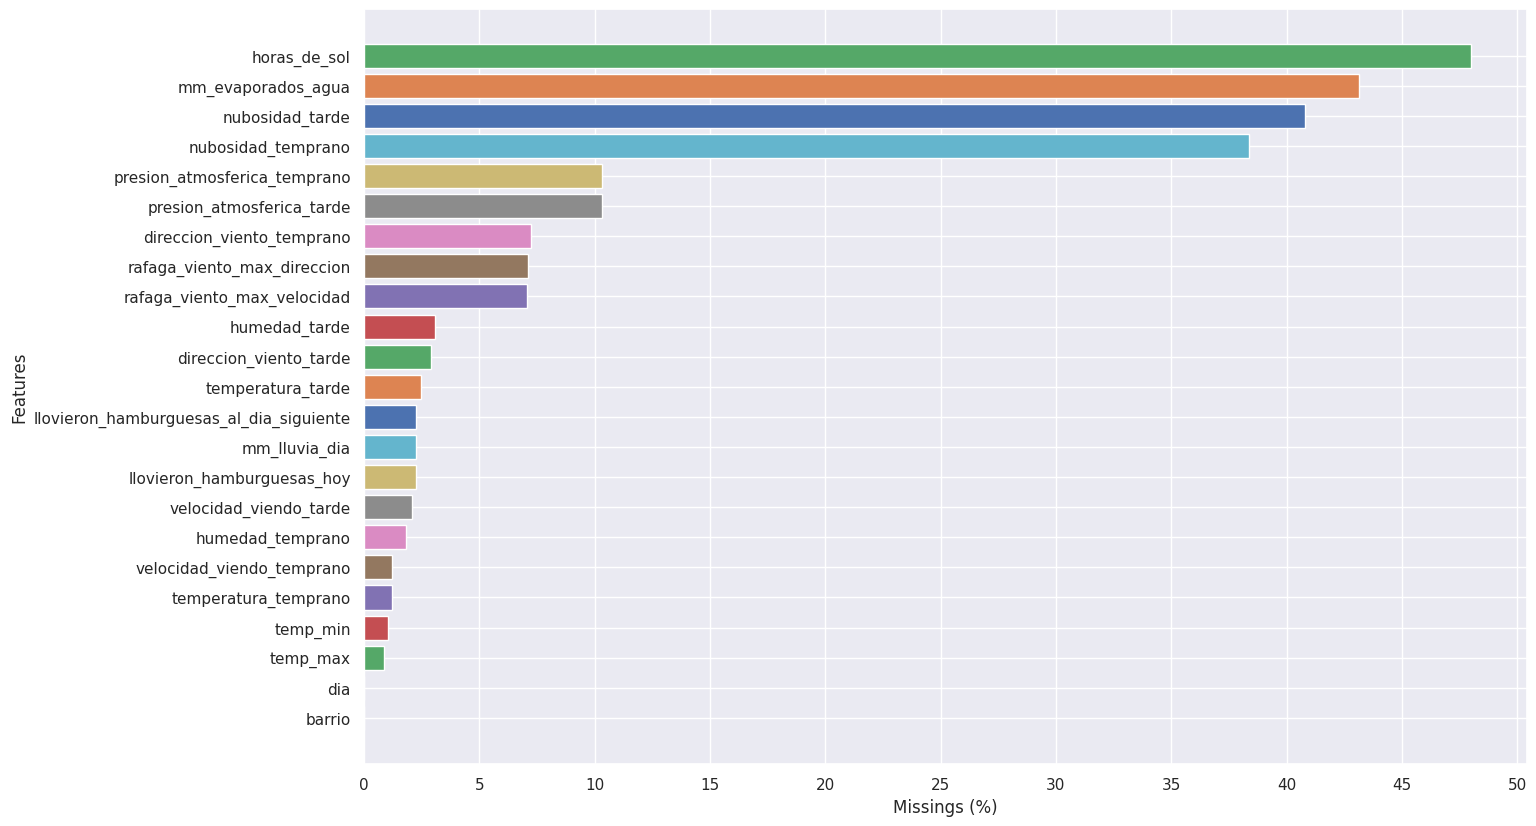

In [12]:
def plot_missings(dataframe):
    fig, ax = plt.subplots(figsize=(15,10))
    ax.set_xlabel("Missings (%)")
    ax.set_ylabel("Features")
    ax.set_xticks(range(0, 61, 5))
    fig.set_dpi(100)

    features_ord = sorted(dataframe.columns, key=lambda f : len(dataframe[dataframe[f].isna()]))
    for feature in features_ord:
      cant_missings = len(dataframe[dataframe[feature].isna()]) / len(dataframe) * 100
      ax.barh(feature, cant_missings)


plot_missings(df)

In [13]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116366 entries, 86942 to 34196
Data columns (total 23 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   barrio                                   116366 non-null  object 
 1   dia                                      116366 non-null  object 
 2   direccion_viento_tarde                   112993 non-null  object 
 3   direccion_viento_temprano                107963 non-null  object 
 4   horas_de_sol                             60510 non-null   float64
 5   humedad_tarde                            112771 non-null  float64
 6   humedad_temprano                         114249 non-null  float64
 7   llovieron_hamburguesas_hoy               113751 non-null  float64
 8   mm_evaporados_agua                       66156 non-null   float64
 9   mm_lluvia_dia                            113751 non-null  float64
 10  nubosidad_tarde              

El gráfico representa el porcentaje de filas con datos faltantes por columna.
Podemos ver en el gráfico que en las columnas de día y barrio no hay ningún dato faltante. La mayoría de estos se encuentran en las columnas de *horas_de_sol*, *mm_evaporados_agua*, *nubosidad_tarde* y *nubosidad_temprano*

## Que rows con datos faltantes podemos dropear sin perder muchos datos?

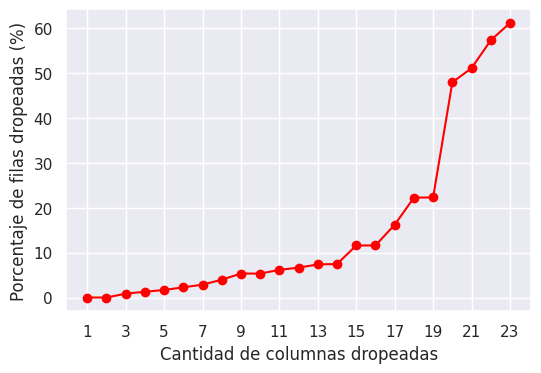

In [14]:
x = range(1, len(df.columns) + 1)
y = []

features_ord = sorted(df.columns, key=lambda f : len(df[df[f].isna()]))
for i in x:
    df_drop = df_original.loc[df_original[features_ord[:i]].dropna().index]
    y.append((1 - len(df_drop)/len(df_original))*100)

plt.figure(dpi=100)
plt.ylabel("Porcentaje de filas dropeadas (%)")
plt.xlabel("Cantidad de columnas dropeadas")
plt.plot(x, y, "o-", color = 'red')
plt.xticks(x[::2])
plt.show()

Este gráfico representa el porcentaje de samples que perdemos del total al dropear las últimas $n$ features con menos datos faltantes del dataset.
Decidimos dropear los samples con NaN de las 16 features con menos porcentaje de datos faltantes.

Porcentaje de samples perdidos:  11.60%


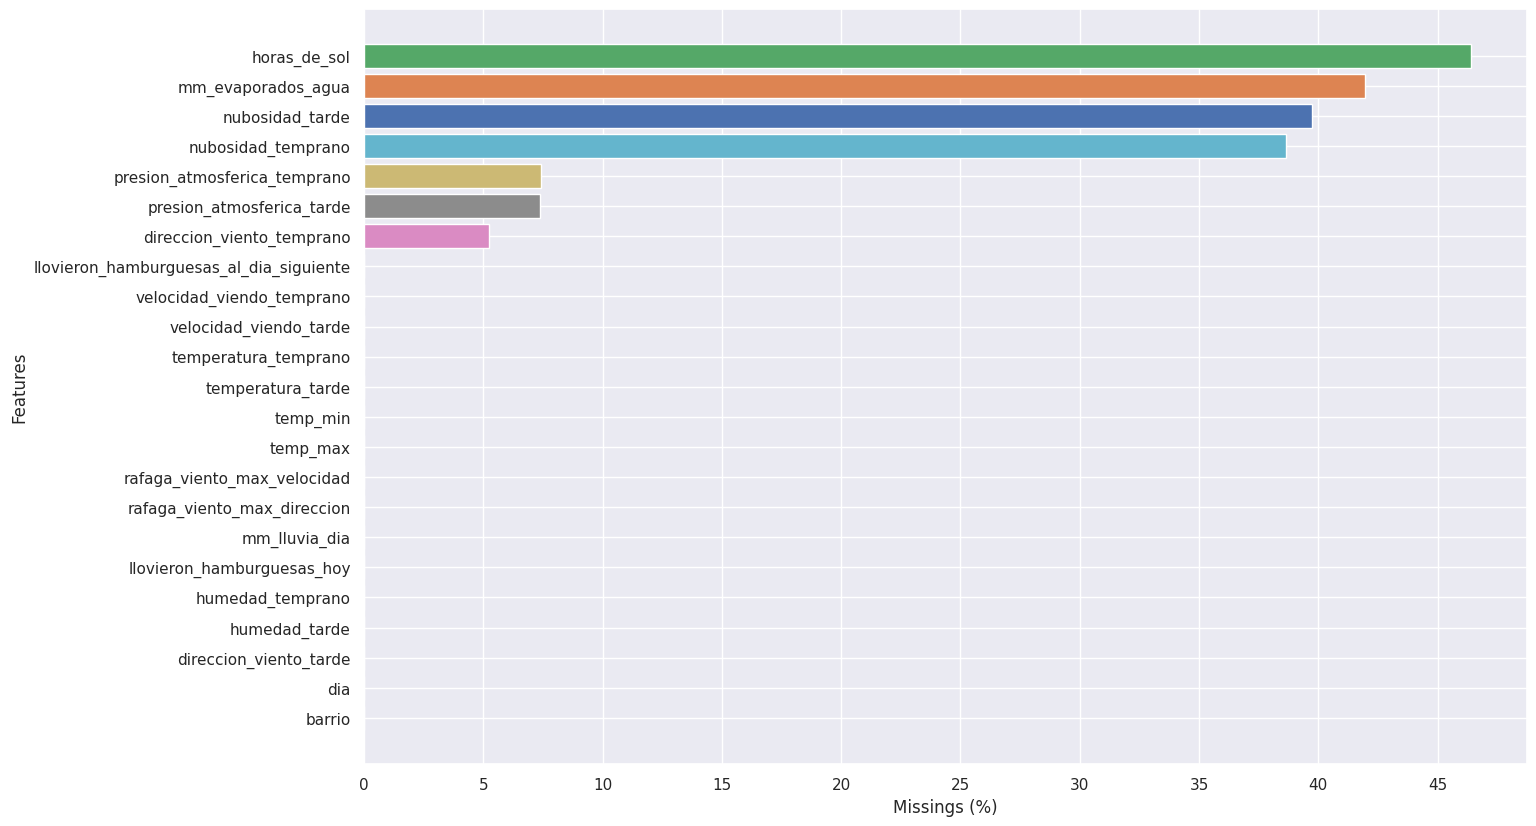

In [15]:
print(f"Porcentaje de samples perdidos: {y[15] : .2f}%")
df = df.loc[df_original[features_ord[:16]].dropna().index]
plot_missings(df)

## Como se relacionan los datos faltantes restantes?

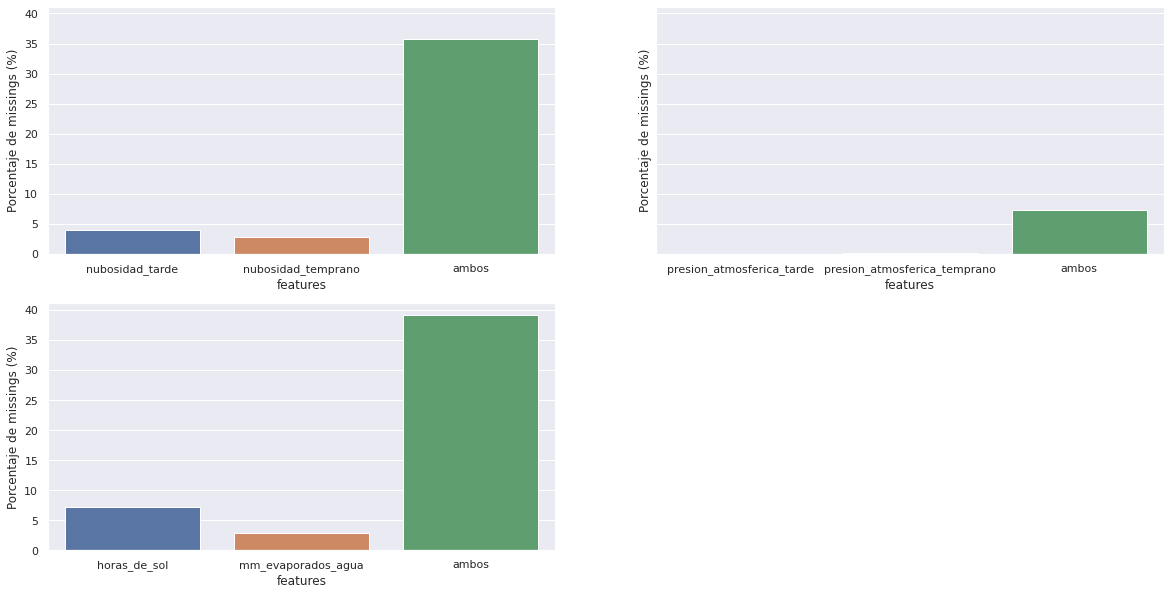

In [16]:
def mostrar_relacion_faltantes(ax, feature1, feature2):
  faltan_en_uno = len(df[df[feature1].isna()]) / len(df) * 100
  faltan_en_otro = len(df[df[feature2].isna()]) / len(df) * 100
  faltan_en_ambos = len(df[df[feature1].isna() & df[feature2].isna()]) / len(df) * 100
  y = [faltan_en_uno - faltan_en_ambos, faltan_en_otro - faltan_en_ambos, faltan_en_ambos]
  x = [feature1, feature2, "ambos"]
  sns.barplot(
      ax=ax,
      x=x,
      y=y
  )

pares_features = [("nubosidad_tarde", "nubosidad_temprano"), ("presion_atmosferica_tarde", "presion_atmosferica_temprano"),
                  ("horas_de_sol", "mm_evaporados_agua")]

fig, axs = plt.subplots(2,2, sharey=True, figsize=(20,10))

for ax,par_feature in zip(axs.flat, pares_features):
  mostrar_relacion_faltantes(ax, par_feature[0], par_feature[1])
  ax.set_ylabel("Porcentaje de missings (%)")
  ax.set_xlabel("features")

axs.flat[-1].axis("off")
plt.show()

En estos gráficos podemos notar que cuando faltan datos en la feature *nubosidad_tarde*, es probable que también falten en *nubosidad_temprano*. Lo mismo sucede con *horas_de_sol* y *mm_evaporados_agua*.
Para el caso de *presion_atmosferica_tarde* y *presion_atmosferica_temprano*, siempre que falta un dato en uno falta también en el otro (para este dataset ya filtrado).

Parece ser un caso de Missing At Random (MAR, no MCAR) ya que hay una cierta relación entre las features en las que faltan datos de una misma fila.

In [17]:
print(df.std(numeric_only = True, skipna = True).sort_values())

cols_missing = ['nubosidad_tarde', 'nubosidad_temprano', 'horas_de_sol', 'presion_atmosferica_temprano', 'presion_atmosferica_tarde', 'mm_evaporados_agua']
for col in cols_missing:
    print(f"\nMax de {col}: {df[col].max()}")
    print(f"Min de {col}: {df[col].min()}")

llovieron_hamburguesas_al_dia_siguiente     0.412308
llovieron_hamburguesas_hoy                  0.413457
nubosidad_tarde                             2.720656
nubosidad_temprano                          2.880336
horas_de_sol                                3.777535
mm_evaporados_agua                          4.182532
temp_min                                    6.430036
temperatura_temprano                        6.529266
temperatura_tarde                           6.979610
presion_atmosferica_tarde                   7.010318
presion_atmosferica_temprano                7.093729
temp_max                                    7.121986
mm_lluvia_dia                               8.270337
velocidad_viendo_tarde                      8.596551
velocidad_viendo_temprano                   8.769377
rafaga_viento_max_velocidad                13.520450
humedad_temprano                           19.221644
humedad_tarde                              20.772177
dtype: float64

Max de nubosidad_tarde: 9.0
Mi

Notamos que para las features con mas missings, su desviación no es tan alta respecto a sus mínimos y máximos, es decir no tienden a alejarse tanto de la media. Decidimos completar estos datos faltantes con ese valor.

In [18]:
reemplazo = {}
for col in cols_missing:
    reemplazo[col] = df[col].mean()

df.fillna(inplace = True, value = reemplazo)

Por último, para la columna *direccion_viento_temprano*, que es categórica, vamos a agregarle una clasificación 'N/A'.

In [19]:
df.fillna(inplace = True, value = {'direccion_viento_temprano' : 'N/A'})

De esta manera, ya tenemos el dataset preparado para analizar.

## ¿Cómo afecta la dirección del viento a la lluvia?

Para ver esto, decidimos representar cada dirección del viento como un ángulo de manera tal que $0$ sea el *Este*, $\frac{\pi}{2}$ o $90°$ el norte, etc. Ignoramos aquellas que no tienen la dirección especificada.
Primero gráficamos la cantidad de samples en cada dirección para estas features.

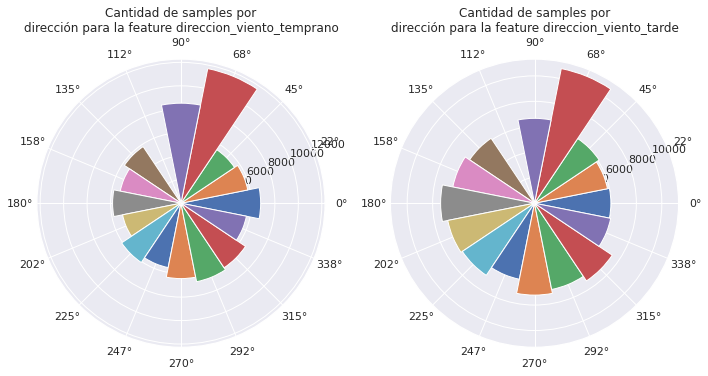

In [20]:
def calcular_angulos(dataframe, feature):
    serie = dataframe[feature].replace({
        'Norte' : 4*np.pi/8,
        'Nornoreste' : 3*np.pi/8,
        'Noreste' : 2*np.pi/8,
        'Estenoreste' : np.pi/8,
        'Este' : 0,
        'Estesureste' : 15*np.pi/8,
        'Sureste' : 14*np.pi/8,
        'Sursureste' : 13*np.pi/8,
        'Sur' : 12*np.pi/8,
        'Sursuroeste' : 11*np.pi/8,
        'suroeste' : 10*np.pi/8,
        'Oestesuroeste' : 9*np.pi/8,
        'Oeste' : 8*np.pi/8,
        'Oestenoroeste' : 7*np.pi/8,
        'Noroeste' : 6*np.pi/8,
        'Nornoroeste' : 5*np.pi/8,
    })
    return serie

def plot_direcciones(dataframe, features, relativo_lluvia = False):
    fig, ax = plt.subplots(ncols = len(features), figsize=(10, 10), subplot_kw=dict(polar=True))
    
    for i, f in enumerate(features):
        df_aux = dataframe[dataframe[f] != 'N/A']
        serie = calcular_angulos(df_aux, f).value_counts()
        titulo = "Cantidad de samples por\ndirección para la feature " + f
        if (relativo_lluvia):
            df_lluvia = df_aux[df_aux['llovieron_hamburguesas_al_dia_siguiente'] == 1]
            serie_lluvia = calcular_angulos(df_lluvia, f)
            serie = serie_lluvia.value_counts()/serie
            titulo = "Relacion de samples en las que llueve hamburguesas\npor dirección para la feature " + f

        for index, row in serie.sort_index().to_frame().iterrows():
            ax[i].bar(index, row[f], width = np.pi/8)
            ax[i].set_xticks(np.linspace(0, 2*np.pi, 16, endpoint = False))
            ax[i].set_title(titulo)
    plt.tight_layout()
    plt.show()
    
plot_direcciones(df, ['direccion_viento_temprano', 'direccion_viento_tarde'])

Ahora podemos graficar la relación entre las samples para las que llueven hamburguesas al día siguiente y el total:

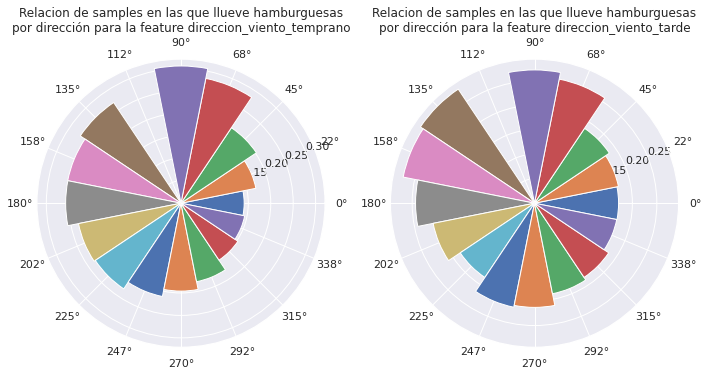

In [21]:
plot_direcciones(df, ['direccion_viento_temprano', 'direccion_viento_tarde'], relativo_lluvia = True)

Podemos notar que para el caso de ambas features, llueve hamburgueas mucho más seguido en las direcciones cercanas al noroeste (alrededor del $0.25$ de las veces) que para las del sureste (alrededor del $0.1$). Si bien no es un factor decisivo, si que hay una diferencia notable que se puede considerar al detectar futuras lluvias.

## ¿Cómo varían las distintas features numéricas cuando llueven hamburguesas al día siguiente?

Vamos a gráficar un violin plot por variable numérica comparando su distribución todos los días vs. los días anteriores a cuando llueve hamburguesas

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102864 entries, 86942 to 34196
Data columns (total 23 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   barrio                                   102864 non-null  object 
 1   dia                                      102864 non-null  object 
 2   direccion_viento_tarde                   102864 non-null  object 
 3   direccion_viento_temprano                102864 non-null  object 
 4   horas_de_sol                             102864 non-null  float64
 5   humedad_tarde                            102864 non-null  float64
 6   humedad_temprano                         102864 non-null  float64
 7   llovieron_hamburguesas_hoy               102864 non-null  float64
 8   mm_evaporados_agua                       102864 non-null  float64
 9   mm_lluvia_dia                            102864 non-null  float64
 10  nubosidad_tarde              

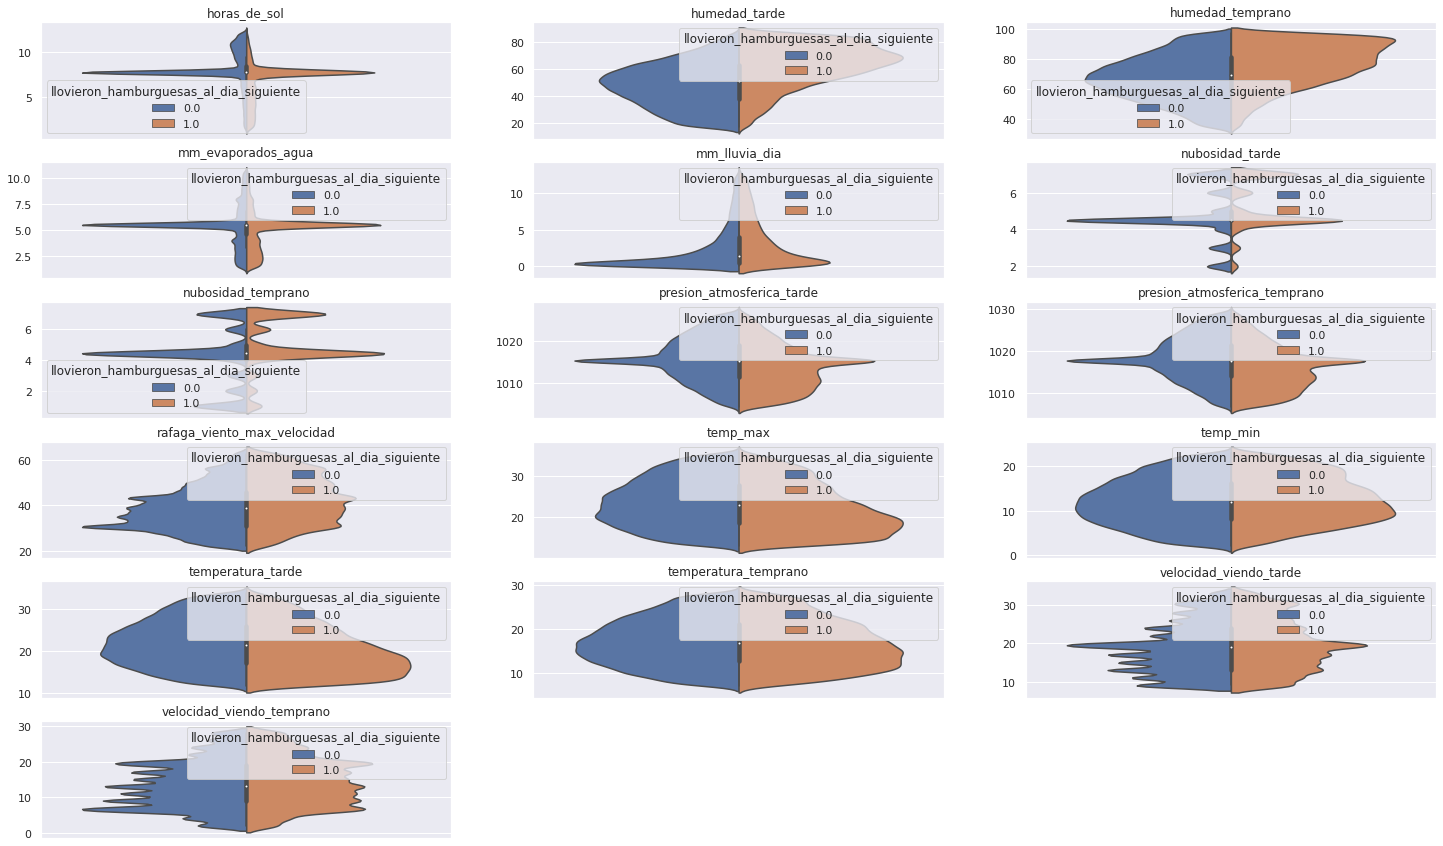

In [23]:
features_num = ['horas_de_sol', 'humedad_tarde', 'humedad_temprano', 'mm_evaporados_agua', 'mm_lluvia_dia',
                'nubosidad_tarde', 'nubosidad_temprano', 'presion_atmosferica_tarde',
                'presion_atmosferica_temprano', 'rafaga_viento_max_velocidad', 'temp_max',
                'temp_min', 'temperatura_tarde', 'temperatura_temprano', 'velocidad_viendo_tarde',
                'velocidad_viendo_temprano']

fig, axs = plt.subplots((len(features_num) + 2)//3, 3, sharex=True, figsize=(25,15))
#fig.set_dpi(50)

#Otra alternativa, las conclusiones no son tan claras
df["all"] = ""
for ax, feature in zip(axs.flat, features_num):
      ax.set_title(feature)
      # Truncamos el dataset para sacar outliers y obtener gráficos más claros
      df_trunc = df[(df[feature] < df[feature].quantile(0.95)) & (df[feature] > df[feature].quantile(0.05))]
      sns.violinplot(
              ax=ax,
              x="all",
              hue="llovieron_hamburguesas_al_dia_siguiente",
              y=feature,
              data=df_trunc,
              #palette="muted",
              split=True\
      ).set(
              xlabel="",
              ylabel=""\
      )

for ax in axs.flat[len(features_num):]:
    ax.axis("off")
plt.show()

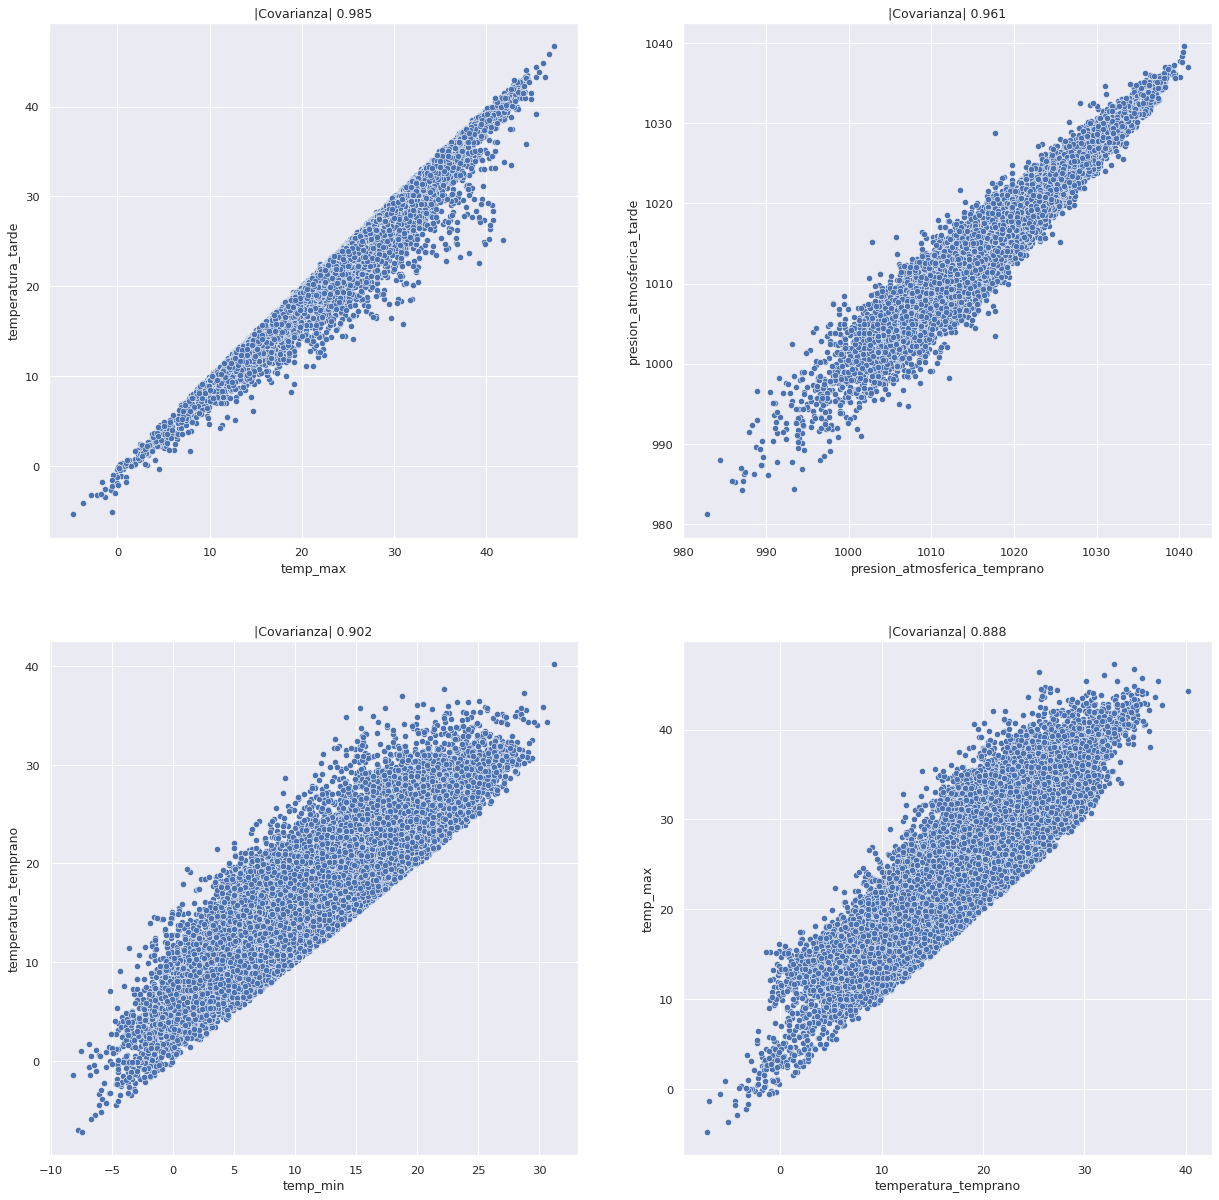

In [24]:
pares_ord_cov = df.corr().abs().unstack().sort_values(ascending=False)
pares_ord_cov = pares_ord_cov[pares_ord_cov < 1] #Salteo diagonal

#Para evitar duplicados, por ej (temp_min, temp_max) y (temp_max, temp_min)
dic_cov = {}
for par_ord in dict(pares_ord_cov):
    dic_cov.setdefault(pares_ord_cov[par_ord], par_ord)
    if len(dic_cov) == 4:
        break
    
fig, axs = plt.subplots(2, 2, figsize=(20,20))

fig.set_dpi(75)
for cov, ax in zip(dic_cov, axs.flat):
    ax.set_title(f"|Covarianza| {cov:.3f}")
    sns.scatterplot(
        x=dic_cov[cov][0],
        y=dic_cov[cov][1],
        #hue="llovieron_hamburguesas_al_dia_siguiente",
        data=df.sample(30000, random_state=0),
        ax=ax,
    )

In [25]:
#Nota: Casi siempre la temperatura maxima se da a la tarde, asi que podemos descartar una de las dos variables porque dan la misma info
#Lo mismo con temp_min y temperatura_temprano, pero no tanto

In [26]:
# Probar: Scatter plot con los 2 de humedad + color segun si llovio hamburguesas
# presión atmosférica tarde y temprano

Podemos también hacer algunos scatters plot de variables que parecen relacionadas para ver si notamos algun patrón cuando llueven hamurguesas.

In [27]:
def graficar_scatter(pareja, dataframe, puntos_extra = None):
    plt.figure(dpi=100)
    sns.scatterplot(
        x=pareja[0],
        y=pareja[1],
        hue='llovieron_hamburguesas_al_dia_siguiente',
        data=dataframe,
        alpha=0.7,
        size=1,
    )

    plt.legend(title="Llovió hamburguesas\nal día siguiente")
    plt.xlabel(pareja[0])
    plt.ylabel(pareja[1])
    
    if puntos_extra is not None:
        plt.plot(puntos_extra[0], puntos_extra[1], color = 'red')
    
    plt.show()

### Velocidad del viento

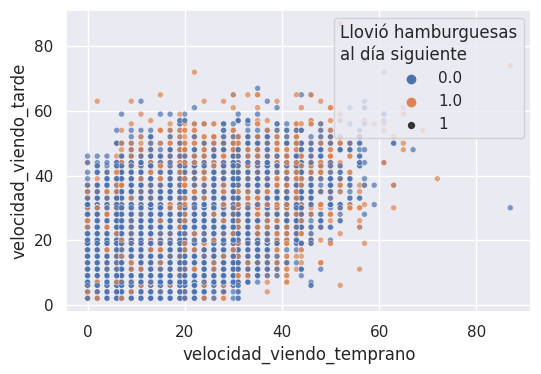

In [28]:
graficar_scatter(('velocidad_viendo_temprano', 'velocidad_viendo_tarde'), df)

A primera vista, no parece haber ninguna relación fácil de detectar con estos parámetros para predecir si va a llover hamburguesas al día siguiente.

### Humedad

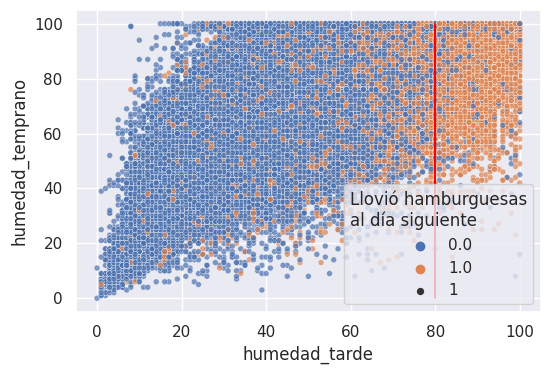

In [29]:
graficar_scatter(('humedad_tarde', 'humedad_temprano'), df, puntos_extra = ([80, 80], [0, 100]))

Este gráfico si parece tener una forma más interesante. A primera vista las variables parecen estár levemente relacionadas, pero se puede interpretar del gráfico que el hecho de que llueva hamburguesas al día siguiente depende más que nada de la humedad de la tarde y no tanto de la de la mañana. Se puede notar que a partir de humedad de la tarde alrededor de 80 hay una concentración muchísimo mayor de puntos en los que al día siguiente llueve.

### Presión atmosférica

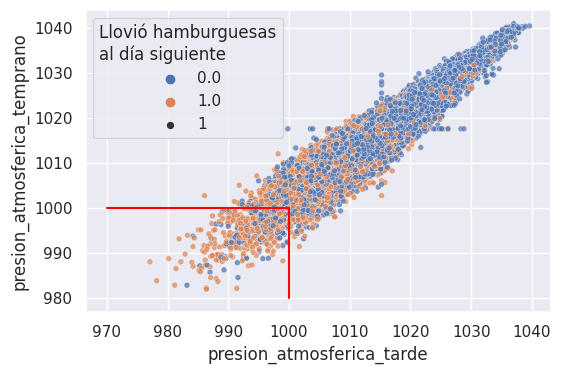

In [30]:
graficar_scatter(('presion_atmosferica_tarde', 'presion_atmosferica_temprano'), df, puntos_extra = ([970, 1000, 1000], [1000, 1000, 980]))

En este gráfico también se puede observar una alta correlación entre las presiones. Parecería que cuando ambas son bajas ($<1000$), se encuentra una concentración bastante grande de samples en las que al día siguiente llueven hamburguesas.

### Temperaturas

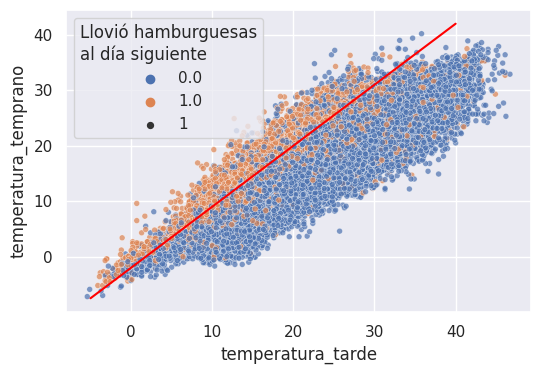

In [31]:
x = np.linspace(-5, 40, 3)
y = 1.1*x - 2

graficar_scatter(('temperatura_tarde', 'temperatura_temprano'), df, (x, y))

Nuevamente tenemos dos variables muy relacionadas, y se puede ver claramente en el gráfico como cuando la temperatura de la mañana está por encima de la recta, para la mayoría de los samples llueve hamburguesas al día siguiente.
La recta es casi $y=x$, es decir que esto se da casi siempre que la temperatura de la mañana es mayor a la de la tarde.

### Temperaturas extremas

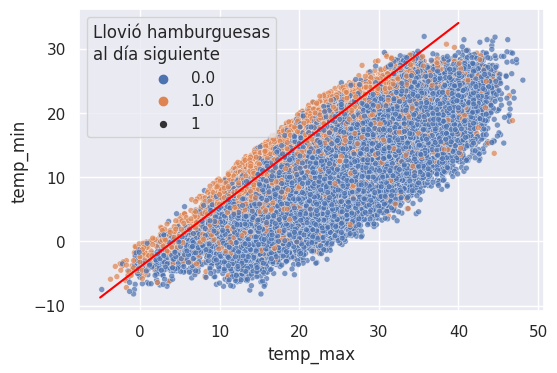

In [65]:
x = np.linspace(-5, 40, 3)
y = 0.95*x - 4
graficar_scatter(('temp_max', 'temp_min'), df, (x, y))

Para las temperaturas máximas y mínimas, tenemos una relación similar a la anterior. En este caso, cuando la temperatura máxima y mínima del día son muy próximas suele llover al día siguiente.

## ¿Cuál es el porcentaje de samples del total llueve al día siguiente?

In [96]:
print(f"{len(df_original[df_original['llovieron_hamburguesas_al_dia_siguiente'] == 'si'])/len(df_original) * 100 :.2f}%")

21.87%


## ¿Cómo varían las features categóricas restantes cuando llueve al día siguiente?

### Barrio

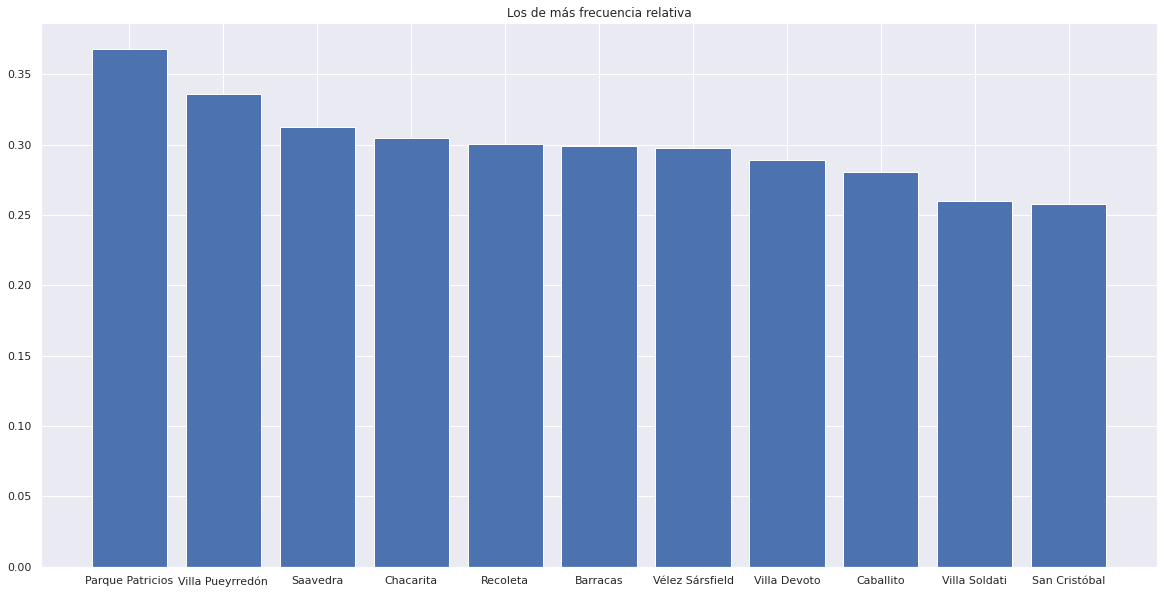

In [136]:
fig = plt.figure(figsize=(20, 10))
con_lluvia = df[df['llovieron_hamburguesas_al_dia_siguiente'] == 1]['barrio'].value_counts()
total = df['barrio'].value_counts()
serie_graf = (con_lluvia / total).sort_values(ascending = False)
serie_graf = serie_graf[:len(serie_graf)//4]
plt.bar(serie_graf.index, serie_graf.array)
plt.title("Los de más frecuencia relativa")
plt.show()

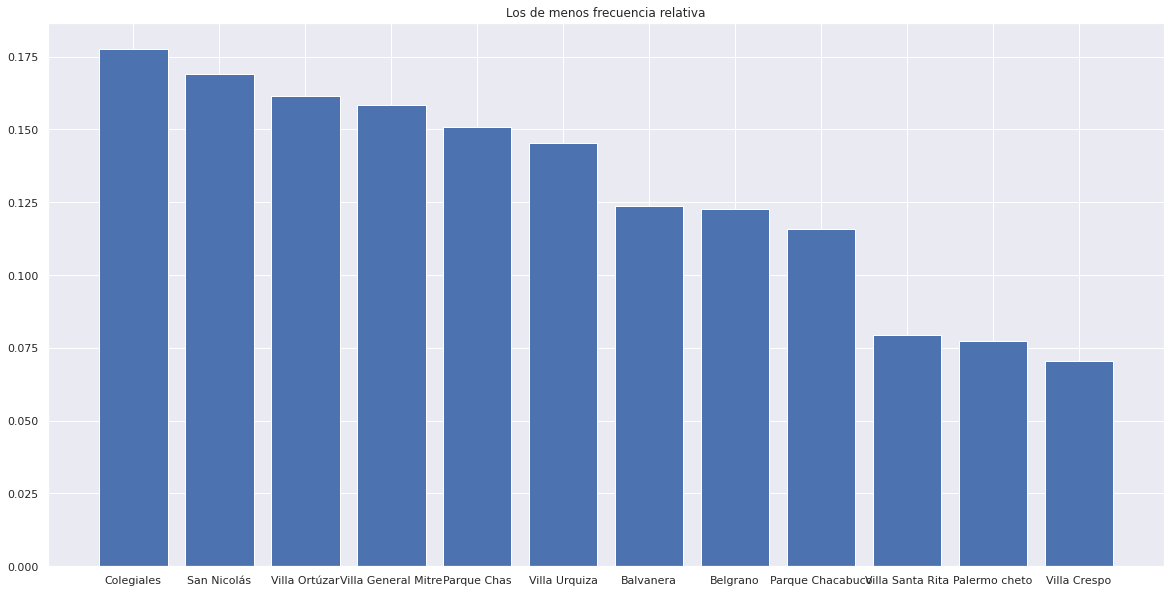

In [138]:
fig = plt.figure(figsize=(20, 10))
con_lluvia = df[df['llovieron_hamburguesas_al_dia_siguiente'] == 1]['barrio'].value_counts()
total = df['barrio'].value_counts()
serie_graf = (con_lluvia / total).sort_values(ascending = False)
serie_graf = serie_graf[3*len(serie_graf)//4:]
plt.bar(serie_graf.index, serie_graf.array)
plt.title("Los de menos frecuencia relativa")
plt.show()

### Lluvia de hamburguesas del día actual

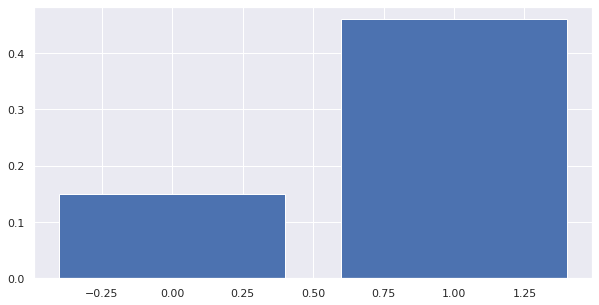

In [121]:
fig = plt.figure(figsize=(10, 5))
con_lluvia = df[df['llovieron_hamburguesas_al_dia_siguiente'] == 1]['llovieron_hamburguesas_hoy'].value_counts()
total = df['llovieron_hamburguesas_hoy'].value_counts()
serie_graf = (con_lluvia / total).sort_values(ascending = False)

plt.bar(serie_graf.index, serie_graf.array)
plt.show()

Podemos notar que si llovió en el día de la fecha aumentan las probabilidades de que llueva al día siguiente mientras que que no lo haya hecho las bajan.

In [167]:
puntajes_viento_temprano = {'Norte' : 0.15, 'Noroeste' : 0.1, 'Oestenoroeste' : 0.1, 'Oeste' : 0.1, 'Nortenoreste' : 0.1,
                            'Este' : -0.1, 'Estesureste' : -0.1, 'Sureste' : -0.1}
puntajes_viento_tarde = {'Norte' : 0.1, 'Noroeste' : 0.1, 'Oestenoroeste' : 0.1, 'Oeste' : 0.05, 'Nortenoreste' : 0.1,
                         'Este' : -0.1, 'Estesureste' : -0.1, 'Sureste' : -0.1}

puntajes_barrio = {'Parque Patricios' : 0.2, 'Villa Pueyrredón' : 0.15, 'Saavedra' : 0.1, 'Chacarita' : 0.1, 'Recoleta' : 0.1,
                   'Barracas' : 0.1, 'Vélez Sarsfield' : 0.1, 'Balvanera' : -0.1, 'Belgrano' : -0.1, 'Parque Chacabuco' : -0.1,
                   'Villa Santa Rita' : -0.15, 'Palermo cheto' : -0.15, 'Villa Crespo' : -0.15}

def baseline(dataframe):
    resultado = []
    for index, row in dataframe.iterrows():
            puntaje = 0.2 # El promedio
            if row['temperatura_temprano'] >= 1.1*row['temperatura_tarde']-2:
                puntaje += 0.5
            else:
                puntaje -= 0.1

            if row['temp_min'] >= 0.95*row['temp_max'] - 4:
                puntaje += 0.5
            else:
                puntaje -= 0.1

            if row['humedad_tarde'] >= 70:
                puntaje += ((row['humedad_tarde'] - 70)**1.8)*0.01
            elif row['humedad_tarde'] <= 60:
                puntaje -= 0.2

            if row['horas_de_sol'] <= 3: #PENDIENTE JUSTIFICAR
                puntaje += 0.8
            elif row['horas_de_sol'] >= 7.5:
                puntaje -= 0.2

            if row['mm_lluvia_dia'] <= 0.8:
                puntaje -= 0.5
                
            if row['llovieron_hamburguesas_hoy'] == 1:
                puntaje += 0.25
            else:
                puntaje -= 0.05
                
            try:
                if row['presion_atmosferica_temprano'] <= 1000 or row['presion_atmosferica_tarde'] <= 1000:
                    puntaje += 0.7
                else:
                    puntaje -= 0.1
            except:
                pass

            puntaje += puntajes_viento_temprano.get(row['direccion_viento_temprano'], 0)
            puntaje += puntajes_viento_temprano.get(row['direccion_viento_tarde'], 0)
            puntaje += puntajes_barrio.get(row['barrio'], 0)

            if puntaje >= 0.7:
                resultado.append('si')
            else:
                resultado.append('no')
    return resultado

resultado_baseline = baseline(df_original)
correctos = 0
unknowns = 0
for i, x in enumerate(df_original['llovieron_hamburguesas_al_dia_siguiente'].tolist()):
    if x != 'si' and x != 'no':
        unknowns += 1
        continue
    if x == resultado_baseline[i]:
        correctos += 1

print(f"Porcentaje de predicciones correctas mínimo: {correctos/len(resultado_baseline) * 100}%")
print(f"Porcentaje de predicciones correctas máximo: {(correctos + unknowns)/len(resultado_baseline) * 100}%")

Porcentaje de predicciones correctas mínimo: 80.82720335487419%
Porcentaje de predicciones correctas máximo: 83.09500893716486%
